In [2]:
!pip install pandas matplotlib
import pandas as pd
import matplotlib.pyplot as plt


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


C:\Users\david\AppData\Local\Temp\ipykernel_37524\1773789494.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [14]:


# Load the CSV data
file_path = 'data/environment_202405221206.csv'  # Update this path
df = pd.read_csv(file_path)

# Display the first few rows of the dataframe
print("First few rows of the dataframe:")
print(df.head())

# Display basic information about the dataframe
print("\nDataframe information:")
print(df.info())

# Convert the 'timestamp' column to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')



# Extract the hour from the timestamp


# df['hour'] = df['timestamp'].dt.hour



C:\Users\david\AppData\Local\Temp\ipykernel_16444\2224531975.py:6: DtypeWarning: Columns (5,7,8,9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


First few rows of the dataframe:
   id                      timestamp    co2  temperature   humidity motion  \
0   5  2023-07-20 15:03:41.824 +0200  720.0    24.938583  43.673706    NaN   
1   6  2023-07-20 15:04:26.847 +0200  126.0    23.833069  44.918823    NaN   
2   5  2023-07-20 15:04:42.144 +0200  726.0    24.965286  43.572998    NaN   
3   5  2023-07-19 17:15:10.218 +0200  682.0    25.293740  54.635620    NaN   
4   1  2023-07-19 17:16:34.463 +0200    NaN     0.000000        NaN    NaN   

   water_meter controller_input_0 controller_input_1 controller_output_0  \
0          NaN              False              False               False   
1          NaN               True              False               False   
2          NaN              False              False               False   
3          NaN                NaN                NaN                 NaN   
4          NaN                NaN                NaN                 NaN   

  controller_output_1  cellular_signal_qu

C:\Users\david\AppData\Local\Temp\ipykernel_16444\2224531975.py:17: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')


In [18]:
for i, ts in enumerate(df['timestamp']):
    try:
        pd.to_datetime(ts)
    except Exception:
        print(f"Error at index {i}: {ts}")

df['timestamp'] = df['timestamp'].interpolate()

df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')

df = df.dropna(subset=['timestamp'])

df['hour'] = df['timestamp'].dt.hour


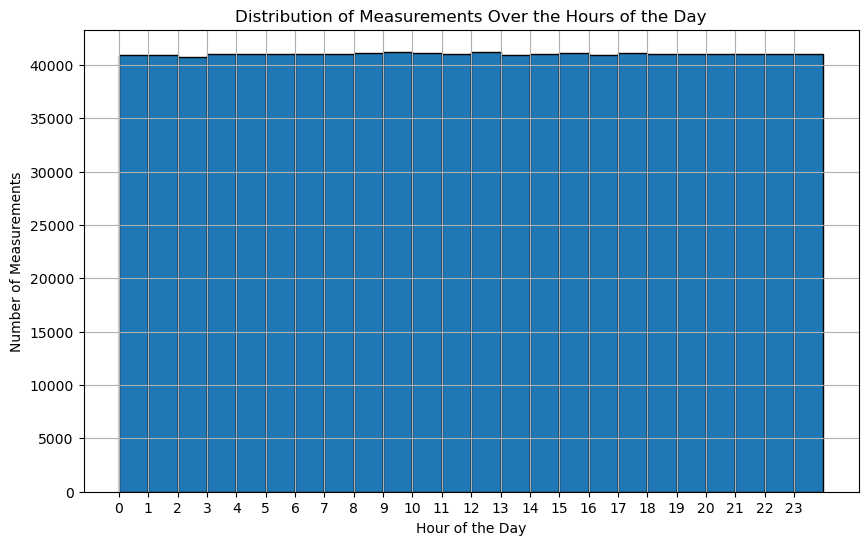

In [19]:
# Plot the distribution of measurements over the hours of the day
plt.figure(figsize=(10, 6))
plt.hist(df['hour'], bins=24, range=(0, 24), edgecolor='black')
plt.title('Distribution of Measurements Over the Hours of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Measurements')
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()


# What is the average humidity level in smart containers? Does it comply with ideal humidity levels (40-60% to prevent bacteria growth)?

In [21]:
# load environment data to a new dataframe
df_env = pd.read_csv('data/environment_202405221206.csv')
df_env_ut = pd.read_csv('data/ut_contaienr_data/environment_202405221219.csv')


# df_env.head()

#average humidity level in smart containers
average_humidity = df_env['humidity'].mean()


# do some data cleanup
df_env['timestamp'] = pd.to_datetime(df_env['timestamp'], errors='coerce')
df_env['humidity'] = pd.to_numeric(df_env['humidity'], errors='coerce')

average_humidity

C:\Users\david\AppData\Local\Temp\ipykernel_37524\1333329863.py:2: DtypeWarning: Columns (5,7,8,9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df_env = pd.read_csv('data/environment_202405221206.csv')
C:\Users\david\AppData\Local\Temp\ipykernel_37524\1333329863.py:13: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df_env['timestamp'] = pd.to_datetime(df_env['timestamp'], errors='coerce')


52.517859939937765

First few rows of the dataframe:
   id                      timestamp  co2  temperature  humidity motion  \
0  10  2024-04-16 00:00:14.452 +0200  NaN          0.0       NaN    NaN   
1  15  2024-04-16 00:02:46.671 +0200  NaN          0.0       NaN    NaN   
2  10  2024-04-16 00:05:23.827 +0200  NaN          0.0       NaN    NaN   
3  15  2024-04-16 00:07:56.219 +0200  NaN          0.0       NaN    NaN   
4  10  2024-04-16 00:10:33.204 +0200  NaN          0.0       NaN    NaN   

   water_meter  controller_input_0  controller_input_1  controller_output_0  \
0          NaN                True               False                False   
1          NaN                True               False                 True   
2          NaN                True               False                False   
3          NaN                True               False                 True   
4          NaN                True               False                False   

   controller_output_1  position_coordina

TypeError: object of type 'type' has no len()

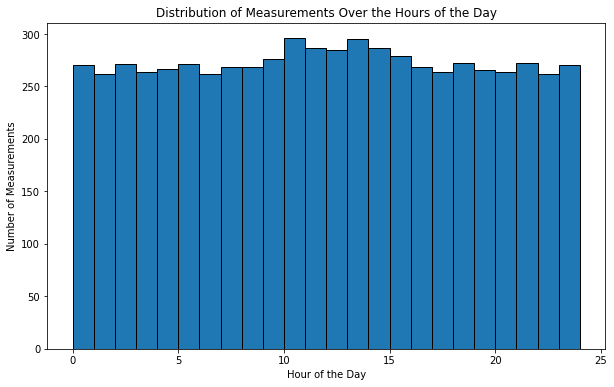

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV data into a DataFrame
file_path = 'data/ut_contaienr_data/environment_202405221219.csv'  # Update this path
df = pd.read_csv(file_path)

# Display the first few rows of the dataframe
print("First few rows of the dataframe:")
print(df.head())

# Display basic information about the dataframe
print("\nDataframe information:")
print(df.info())

# Convert the 'timestamp' column to datetime, handling any errors during conversion
df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')

# Check for any NaT values that couldn't be converted
print("\nNumber of NaT values in 'timestamp' column:")
print(df['timestamp'].isna().sum())

# Extract the hour from the timestamp
df['hour'] = df['timestamp'].dt.hour

# Plot the distribution of measurements over the hours of the day
plt.figure(figsize=(10, 6))
plt.hist(df['hour'], bins=24, range=(0, 24), edgecolor='black')
plt.title('Distribution of Measurements Over the Hours of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Measurements')
plt.grid(True)
plt.show()


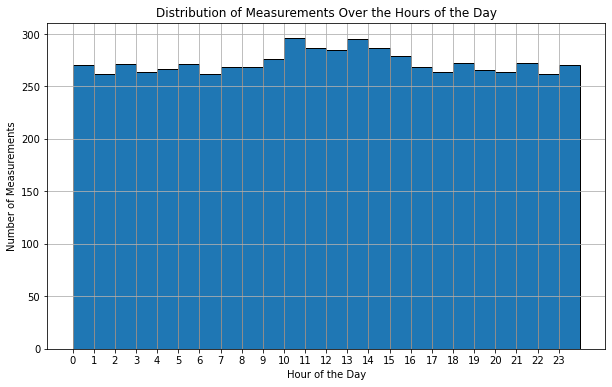

In [34]:
# Drop rows with NaT in 'timestamp' column
df = df.dropna(subset=['timestamp'])

# Extract the hour from the timestamp
df['hour'] = df['timestamp'].dt.hour

# Plot the distribution of measurements over the hours of the day
plt.figure(figsize=(10, 6))
plt.hist(df['hour'], bins=24, range=(0, 24), edgecolor='black')
plt.title('Distribution of Measurements Over the Hours of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Measurements')
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()

In [166]:
#descriptive statsitics for temperature and humidity. co2
df[['temperature', 'humidity', 'co2']].describe()


,temperature,humidity,co2
count,6549.000000,6181.000000,6181.000000
mean,15.136405,52.063749,425.595535
std,7.005861,9.955314,100.320197
min,0.000000,32.620914,242.000000
25%,9.076269,43.224940,409.000000
50%,17.784216,49.377800,433.000000
75%,20.291655,60.224007,464.000000
max,28.890112,74.107320,1774.000000


In [193]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV data into a DataFrame
file_path = 'data/ut_contaienr_data/environment_202405221219.csv'  # Update this path

df = pd.read_csv(file_path)

#only keep rows with id 10
df = df[df['id'] == 10]

# Convert the 'timestamp' column to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')

# Drop rows with NaT in 'timestamp' column
df = df.dropna(subset=['timestamp'])

# Set the timestamp column as the index
df.set_index('timestamp', inplace=True)

df['controller_input_1'] = pd.to_numeric(df['controller_input_1'], errors='coerce')

# Fill NaN values in 'motion' column with False and convert to int
df['motion'] = df['motion'].fillna(False).astype(int)
df['controller_input_1'] = df['controller_input_1'].fillna(False).astype(int)
df['controller_output_0'] = df['controller_output_0'].fillna(False).astype(int)
df['controller_output_1'] = df['controller_output_1'].fillna(False).astype(int)


# Resample the data to 15-minute intervals and aggregate
resampled_df = df.resample('15T').agg({
    'temperature': 'count',
    'humidity': 'count',
    'motion': 'sum',
    'controller_input_1': 'sum',
    'controller_output_0': 'sum',  # AC status
    'controller_output_1': 'sum'   # Heating status
})

C:\Users\david\AppData\Local\Temp\ipykernel_37524\2124076785.py:24: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['motion'] = df['motion'].fillna(False).astype(int)
C:\Users\david\AppData\Local\Temp\ipykernel_37524\2124076785.py:31: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  resampled_df = df.resample('15T').agg({


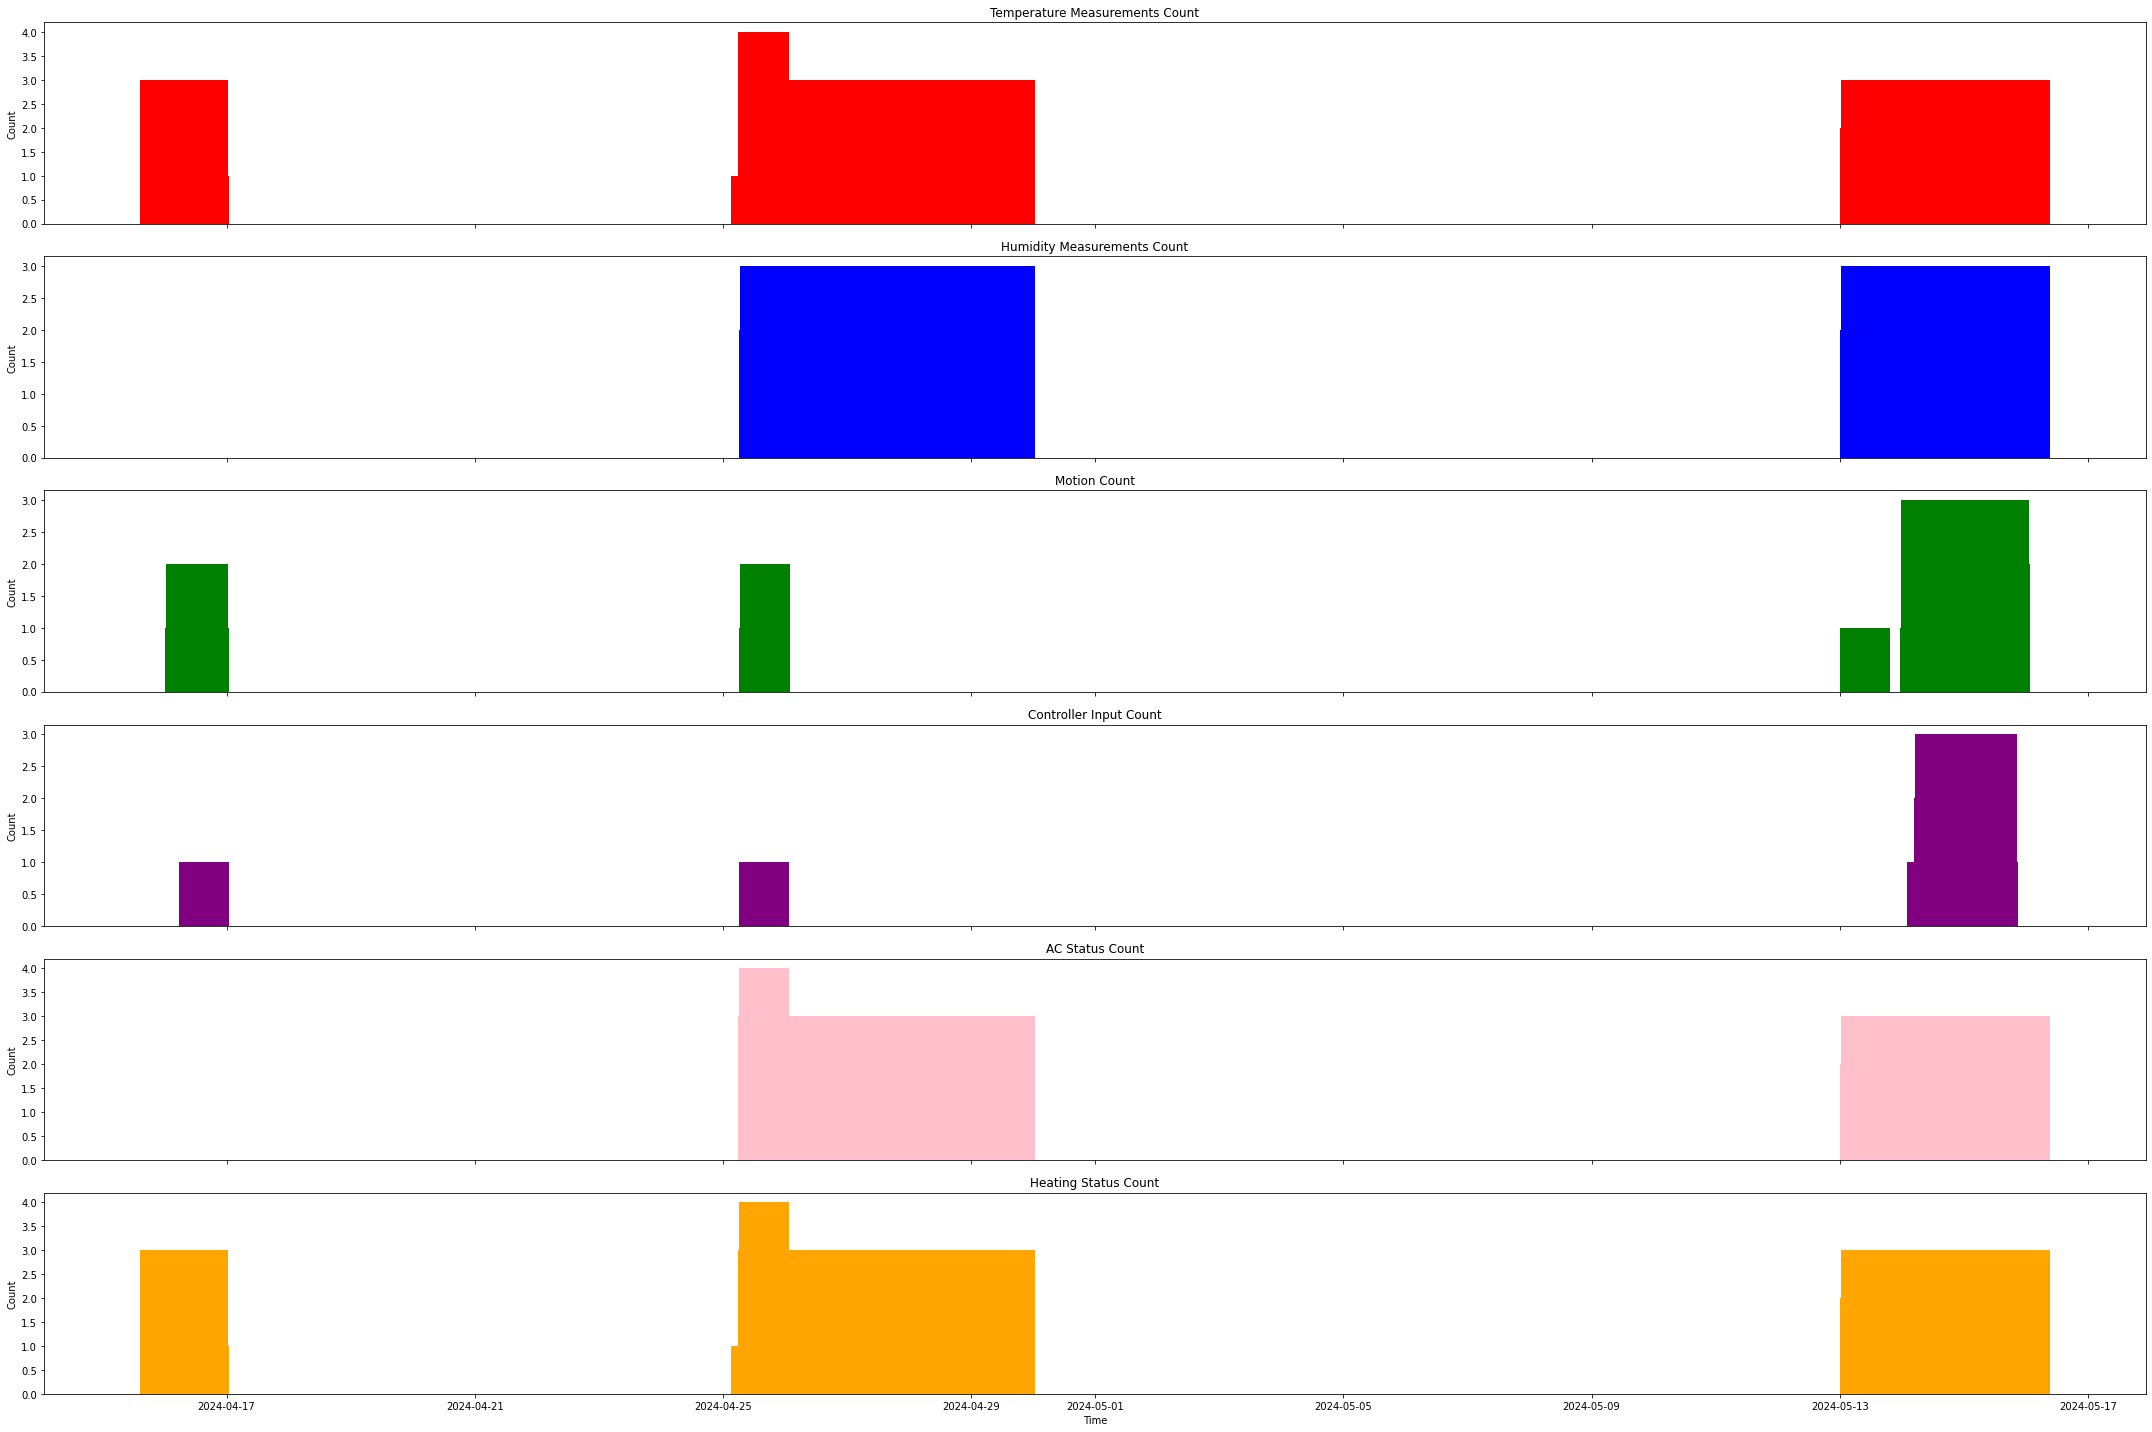

In [196]:
# Create subplots
fig, axes = plt.subplots(6, 1, figsize=(30, 20), sharex=True)

# Plot temperature counts
axes[0].bar(resampled_df.index, resampled_df['temperature'], color='red')
axes[0].set_title('Temperature Measurements Count')
axes[0].set_ylabel('Count')

# Plot humidity counts
axes[1].bar(resampled_df.index, resampled_df['humidity'], color='blue')
axes[1].set_title('Humidity Measurements Count')
axes[1].set_ylabel('Count')

# Plot motion counts
axes[2].bar(resampled_df.index, resampled_df['motion'], color='green')
axes[2].set_title('Motion Count')
axes[2].set_ylabel('Count')

#plot controller input counts
axes[3].bar(resampled_df.index, resampled_df['controller_input_1'], color='purple')
axes[3].set_title('Controller Input Count')
axes[3].set_ylabel('Count')


# Plot AC status counts
axes[4].bar(resampled_df.index, resampled_df['controller_output_0'], color='pink')
axes[4].set_title('AC Status Count')
axes[4].set_ylabel('Count')

# Plot heating status counts
axes[5].bar(resampled_df.index, resampled_df['controller_output_1'], color='orange')
axes[5].set_title('Heating Status Count')
axes[5].set_ylabel('Count')
axes[5].set_xlabel('Time')

# Adjust layout
plt.tight_layout()
plt.show()